1980 410.15353535353535


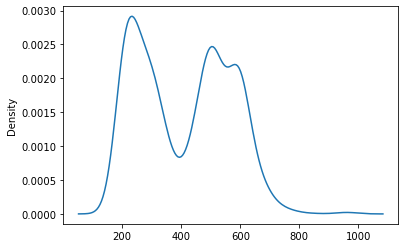

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pub = pd.read_csv('../pub.log', sep=' ', index_col=0, names=['timestamp'])
sub = pd.read_csv('../sub.log', sep=' ', index_col=0, names=['timestamp'])

latency = []
for i, r in sub.iterrows():
    latency.append(sub.loc[i,'timestamp'] - pub.loc[i,'timestamp'])
latency = np.array(latency)
latency = np.extract(latency<1000, latency)

print(latency.shape[0], np.average(latency))
sns.distplot(latency, hist=False)

3654 537.1518883415436


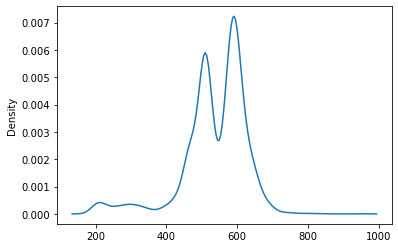

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pub = pd.read_csv('../pub_50.log', sep=' ', index_col=0, names=['timestamp'])
sub = pd.read_csv('../sub_50.log', sep=' ', index_col=0, names=['timestamp'])

latency = []
for i, r in sub.iterrows():
    latency.append(sub.loc[i,'timestamp'] - pub.loc[i,'timestamp'])
latency = np.array(latency)
latency = np.extract(latency<1000, latency)

print(latency.shape[0], np.average(latency))
sns.distplot(latency, hist=False)

# plt.plot(latency)

9957


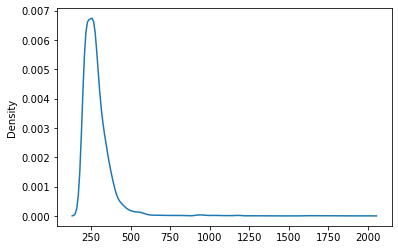

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rtt = pd.read_csv('../service_test/client.log').to_numpy()
rtt = np.extract(rtt<2000, rtt)
print(rtt.shape[0])
sns.distplot(rtt, hist=False)